# Introduction to Logistic Regression
This notebooks has been prepared based on:
- https://www.dataschool.io/guide-to-logistic-regression/
- https://github.com/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb

| ML Type / Data Type | Continous | <b>Categorical</b> |
| --- | --- | --- |
| <b>Supervised</b> | Regression | <b>Classification</b> |
| Unsupervised | Dimension Reduction | Clustering |

This is <b>Supervised Classification</b> algorithm for <b>Categorical response</b> variable.

Here are just a few of the attributes of logistic regression that make it incredibly popular: it's fast, it's highly interpretable, it doesn't require input features to be scaled, it doesn't require any tuning, it's easy to regularize, and it outputs well-calibrated predicted probabilities.

But despite its popularity, it is often misunderstood. Here are a few common questions about logistic regression:
- Why is it called "logistic regression" if it's used for classification?
- Why is it considered a linear model?
- How do you interpret the model coefficients?

In this Notebook, we will cover folowing topics to understand Logistic Regression in-depth:
1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Demonstrate how logistic regression works with categorical features
8. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response

In [1]:
# glass identification dataset
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']

glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


<b>Question:</b> Pretend that we want to predict <b>ri</b>, and our only feature is <b>al</b>. How could we do it using machine learning?

<b>Answer:</b> We could frame it as a regression problem, and use a linear regression model with <b>al</b> as the only feature and <b>ri</b> as the response.

<b>Question:</b> How would we <b>visualize</b> this model?

<b>Answer:</b> Create a scatter plot with <b>al</b> on the x-axis and <b>ri</b> on the y-axis, and draw the line of best fit.

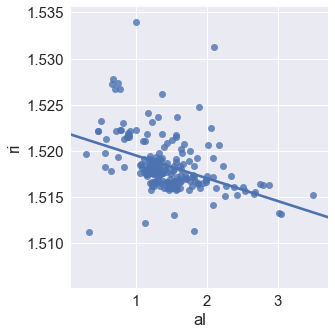

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

sns.lmplot(x='al', y='ri', data=glass, ci=None)

<b>Question:</b> How would we draw this plot without using Seaborn?

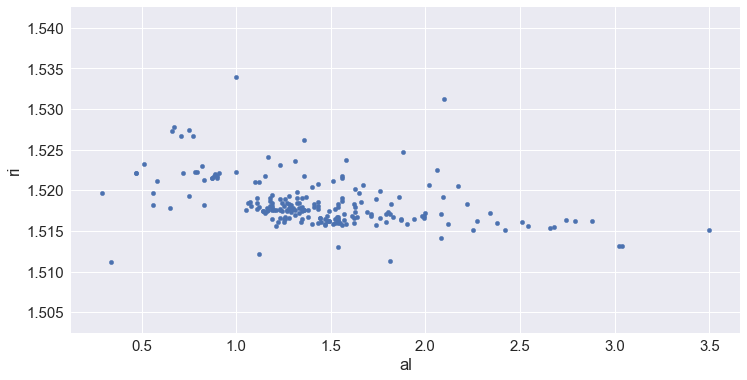

In [3]:
plt.rcParams['figure.figsize'] = (12, 6)

# scatter plot using Pandas# scatt 
glass.plot(kind='scatter', x='al', y='ri');

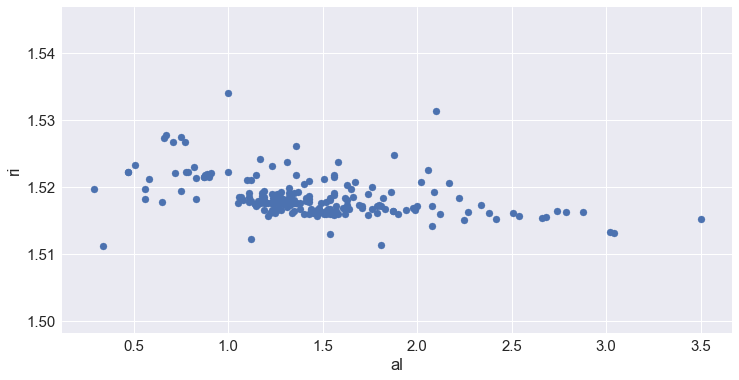

In [4]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri');

In [5]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

# make predictions for all values of X# make  
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


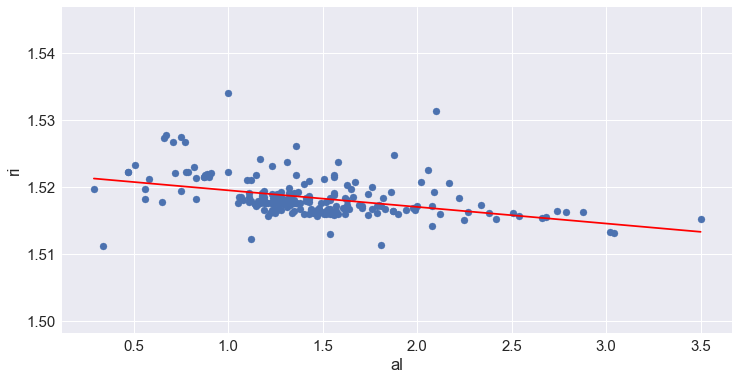

In [6]:
# plot the predicted line and the dataset
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri');

## Refresher: interpreting linear regression coefficients
Linear regression equation: $y = \beta_0 + \beta_1x$

In [7]:
# compute prediction for al=2 using the equation
print('Predicting ri for al=2 through linear equation: ', linreg.intercept_ + linreg.coef_ * 2)

# compute prediction for al=2 using the predict method
print('Predicting ri for al=2 through model: ', linreg.predict(2))

# examine coefficient for al
model_coef = zip(feature_cols, linreg.coef_)

print('Model Coefficients:')
for values in model_coef:
    print(values)  # print each coefficient

Predicting ri for al=2 through linear equation:  [ 1.51699012]
Predicting ri for al=2 through model:  [ 1.51699012]
Model Coefficients:
('al', -0.0024776063874696235)


<b>Interpretation:</b> A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [8]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
print('Predicting ri for al=3 through linear equation: ', 1.51699012 - 0.0024776063874696235)

# compute prediction for al=3 using the predict method
print('Predicting ri for al=3 through model: ', linreg.predict(3))

Predicting ri for al=3 through linear equation:  1.5145125136125304
Predicting ri for al=3 through model:  [ 1.51451251]


## Part 2: Predicting a Categorical Response

In [9]:
# examine glass_type - how many categories and their frequency
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [10]:
# Let's assume
# types 1, 2, 3 are window glass - Let's denote them as 0
# types 5, 6, 7 are household glass - Let's denote them as 1
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting <b>household</b> using <b>al</b>. Let's visualize the relationship to figure out how to do this:

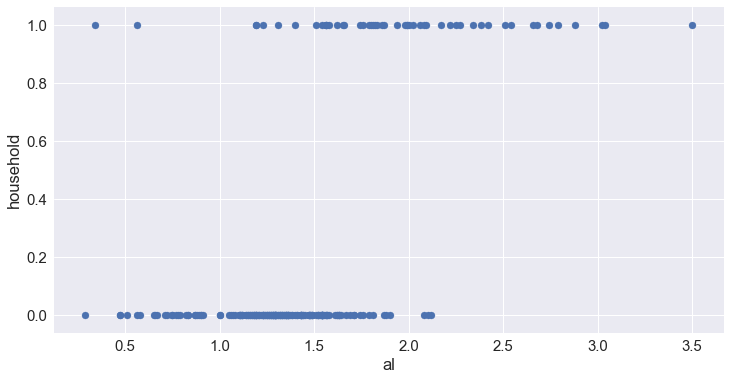

In [11]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household');

Let's draw a regression line, like we did before using linear regression model:

In [12]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

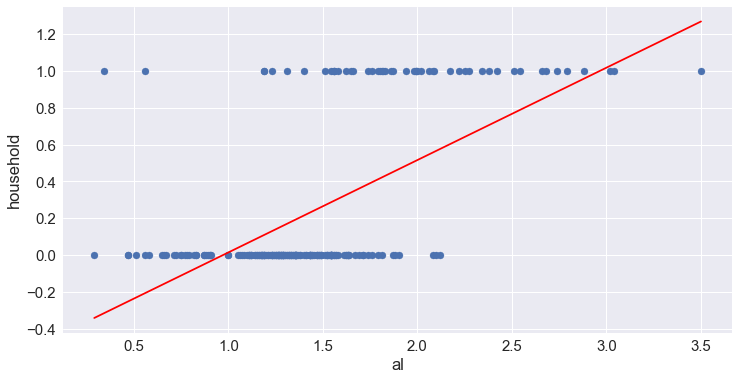

In [13]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household');

If <b>al=3</b>, what class do we predict for household? <b>1</b>

If <b>al=1.5</b>, what class do we predict for household? <b>0</b>

We predict the 0 class for <b>lower</b> values of al, and the 1 class for <b>higher</b> values of al. What's our cutoff value? Around <b>al=2</b>, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if <b>household_pred >= 0.5</b>, we predict a class of <b>1</b>, else we predict a class of <b>0</b>.

In [14]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
labels = np.where(nums > 10, 'big', 'small')

nums_labels = zip(nums, labels)

print('Nums & Labels Combination:')
for values in nums_labels:
    print(values)  # print each combination when num > 10

Nums & Labels Combination:
(5, 'small')
(15, 'big')
(8, 'small')


In [15]:
# transform household_pred to 1 or 0 using np.where
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


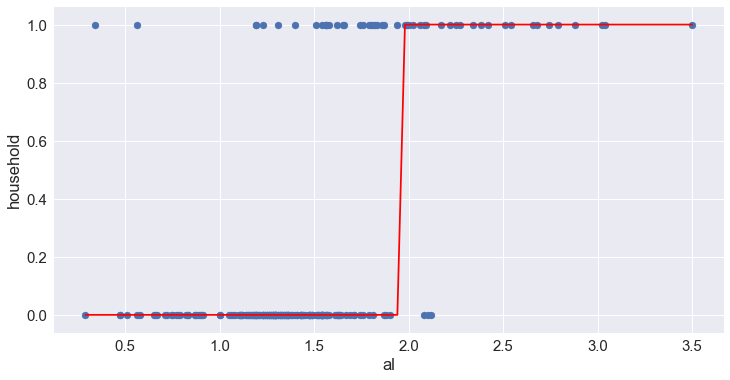

In [16]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household');

## Part 3: Using Logistic Regression Instead
Logistic regression can do what we just did above using linear regression:

In [17]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

Text(0,0.5,'household')

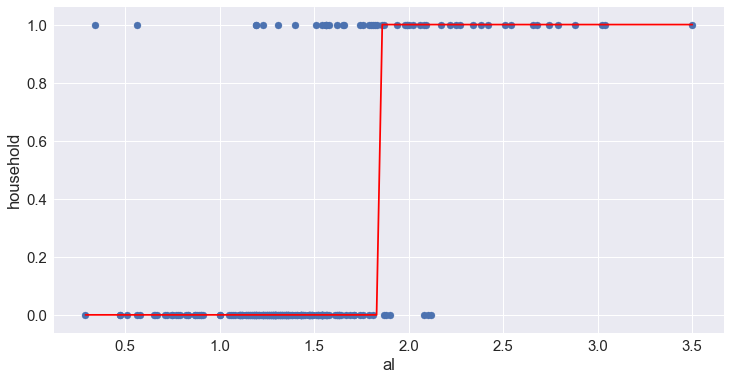

In [18]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the <b>predicted probabilities</b> instead of just the <b>class predictions</b>, to understand how confident we are in a given prediction?

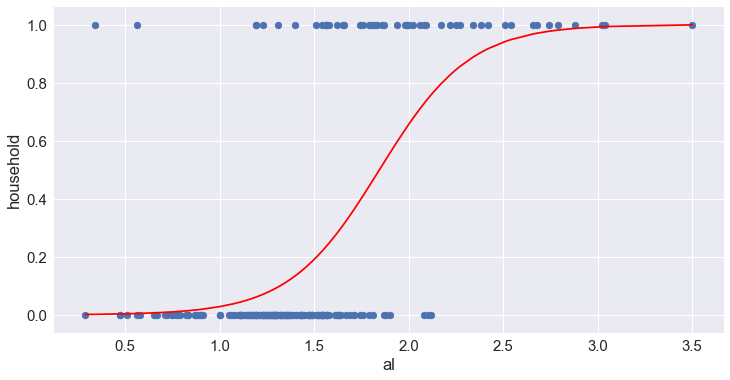

In [19]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household');

In [20]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1.

## Part 4: Probability, odds, e, log, log-odds
$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$
Examples:
- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2
$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [21]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is <b>e</b>? It is the base rate of growth shared by all continually growing processes:

In [22]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

What is a <b>(natural) log</b>? It gives you the time needed to reach a certain level of growth:

In [23]:
# time needed to grow 1 unit to 2.718 units# time n 
np.log(2.718)

0.99989631572895199

It is also the <b>inverse<b/> of the exponential function:

In [24]:
np.log(np.exp(5))

5.0

In [25]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Part 5: What is Logistic Regression?
<b>Linear regression:</b> continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$
<b>Logistic regression:</b> log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$
This is called the <b>logit function</b>.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$
The equation can be rearranged into the <b>logistic function</b>:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$
In other words:
- Logistic regression outputs the <b>probabilities of a specific class</b>
- Those probabilities can be converted into <b>class predictions</b>

The <b>logistic function</b> has some nice properties:
- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for <b>binary classification problems</b> (two response classes). But what about <b>multi-class classification problems</b> (more than two response classes)?
- Most common solution for classification models is <b>"one-vs-all"</b> (also known as <b>"one-vs-rest"</b>): decompose the problem into multiple binary classification problems
- <b>Multinomial logistic regression</b> can solve this as a single problem
## Part 6: Interpreting Logistic Regression Coefficients

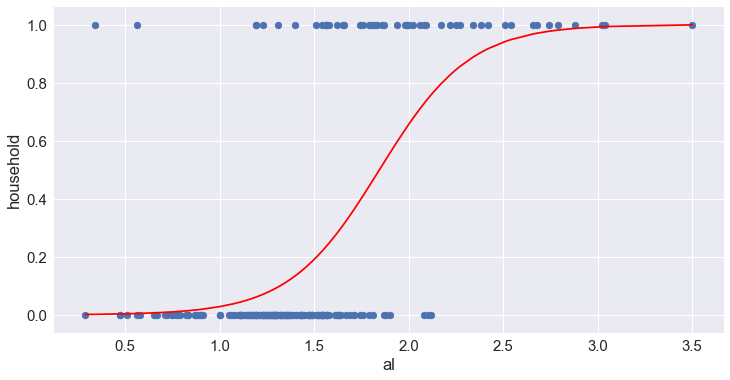

In [26]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household');

In [27]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
print('Log Odds for al=2: ', logodds)

# convert log-odds to odds
odds = np.exp(logodds)
print('Converting Log Odds to Odds for al=2: ', odds)

# convert odds to probability
prob = odds/(1 + odds)
print('Converting Odds to Probability for al=2: ', prob)

# compute predicted probability for al=2 using the predict_proba method
print('Probability computed through logistic model for al=2: ', logreg.predict_proba(2)[:, 1])

# examine the coefficient for al
al_coef = zip(feature_cols, logreg.coef_[0])
print('Coefficient of al feature:')
for values in al_coef:
    print(values)

Log Odds for al=2:  [ 0.64722323]
Converting Log Odds to Odds for al=2:  [ 1.91022919]
Converting Odds to Probability for al=2:  [ 0.65638445]
Probability computed through logistic model for al=2:  [ 0.65638445]
Coefficient of al feature:
('al', 4.1804038614510919)


<b>Interpretation:</b> A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [28]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
print('Probability Calculated for al=3: ', prob)

# compute predicted probability for al=3 using the predict_proba method
print('Probability computed by model for al=3: ', logreg.predict_proba(3)[:, 1])

Probability Calculated for al=3:  0.992058083917
Probability computed by model for al=3:  [ 0.99205808]


<b>Bottom line:</b> Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

<b>Interpretation:</b> For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [29]:
# examine the intercept# examin 
print('Intercept at al=0: ', logreg.intercept_)

# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
print('Probability for al=0: ', prob)

Intercept at al=0:  [-7.71358449]
Probability for al=0:  [ 0.00044652]


That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.
<img src="http://drive.google.com/uc?export=view&id=19T0WW34mhh3qCGS6XFbIdxLNg9FLYMFm" />
Changing the $\beta_0$ value shifts the curve <b>horizontally</b>, whereas changing the $\beta_1$ value changes the <b>slope</b> of the curve.

## Part 7: Using Logistic Regression with Categorical Features
Logistic regression can still be used with <b>categorical features</b>. Let's see what that looks like and then Let's use Seaborn to draw the logistic curve:

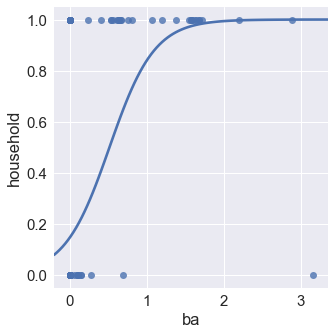

In [30]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

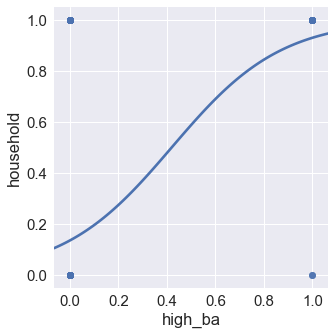

In [31]:
# categorical feature
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

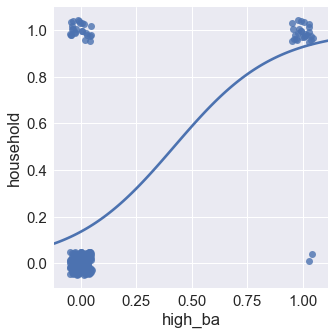

In [32]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [33]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
# examine the coefficient for high_ba
al_coef = zip(feature_cols, logreg.coef_[0])
print('Coefficient of al feature:')
for values in al_coef:
    print(values)

Coefficient of al feature:
('high_ba', 4.4273153450187213)


<b>Interpretation:</b> Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

## Part 8: Comparing Logistic Regression with Other Models
Advantages of logistic regression:
- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:
- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions